# Objectives:

Clean the data and update the columns with correct data types.

Questions to answer with data analysis
1. Find Batting Average
2. Show runs scored against each country in descending order of runs
3. Top 5 venues for a batsman with runs scored
4. Top 5 venues for batsman with average
5. Top 3 modes of dismissal

In [15]:
import cricpy.analytics as ca
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [3]:
#help(ca.getPlayerData)

In [4]:
kohli =ca.getPlayerData(253802,dir="..",file="kohli.csv",type="batting",homeOrAway=[1,2], result=[1,2,4])

In [5]:
kohli

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,4,13,10,1,0,40.00,5,caught,1,v West Indies,Kingston,20 Jun 2011
1,15,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,20 Jun 2011
2,0,1,2,0,0,0.00,5,caught,1,v West Indies,Bridgetown,28 Jun 2011
3,27,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,28 Jun 2011
4,30,62,53,2,0,56.60,5,caught,2,v West Indies,Roseau,6 Jul 2011
5,DNB,-,-,-,-,-,-,-,4,v West Indies,Roseau,6 Jul 2011
6,52,154,111,5,0,46.84,6,caught,2,v West Indies,Mumbai,22 Nov 2011
7,63,136,114,3,1,55.26,6,caught,4,v West Indies,Mumbai,22 Nov 2011
8,11,28,21,1,0,52.38,7,caught,2,v Australia,Melbourne,26 Dec 2011
9,0,3,1,0,0,0.00,6,lbw,4,v Australia,Melbourne,26 Dec 2011


In [6]:
def convert_column(df, col_name=None, d_type=None):
    if col_name==None or d_type==None: 
        return df
    new_col = col_name + '_' + d_type
    df[new_col] = 0
    
    for i in range(df.shape[0]):
        if df[col_name].iloc[i].isdigit():
            df[new_col].iloc[i] = int(df[col_name].iloc[i])
        elif '*' in df[col_name].iloc[i]:
            df[new_col].iloc[i] = int(df[col_name].iloc[i].replace('*',''))
        else:
            df[new_col].iloc[i] = 0
    return df

In [7]:
kohli = convert_column(kohli, col_name ='Runs', d_type='int')
kohli = convert_column(kohli, col_name ='Mins', d_type='int')
kohli = convert_column(kohli, col_name ='BF', d_type='int')
kohli = convert_column(kohli, col_name ='4s', d_type='int')
kohli = convert_column(kohli, col_name ='6s', d_type='int')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
kohli.dtypes

Runs          object
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
Runs_int       int64
Mins_int       int64
BF_int         int64
4s_int         int64
6s_int         int64
dtype: object

# Calculating Batting Average

In [9]:
kohli['Runs_int'].sum()

7202

In [10]:
total_dismissals = kohli.shape[0] - kohli[(kohli['Dismissal']=='not out') | (kohli['Dismissal']=='-')].shape[0]
total_dismissals

131

In [11]:
batting_average = kohli['Runs_int'].sum()/total_dismissals
print('Virat Kohli batting average: {}'.format(batting_average))

Virat Kohli batting average: 54.97709923664122


_______________________________________________________________________________________________________________________________________________

# Runs scored against each opponent

In [12]:
kohli

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Runs_int,Mins_int,BF_int,4s_int,6s_int
0,4,13,10,1,0,40.00,5,caught,1,v West Indies,Kingston,20 Jun 2011,4,13,10,1,0
1,15,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,20 Jun 2011,15,72,54,2,0
2,0,1,2,0,0,0.00,5,caught,1,v West Indies,Bridgetown,28 Jun 2011,0,1,2,0,0
3,27,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,28 Jun 2011,27,118,107,1,1
4,30,62,53,2,0,56.60,5,caught,2,v West Indies,Roseau,6 Jul 2011,30,62,53,2,0
5,DNB,-,-,-,-,-,-,-,4,v West Indies,Roseau,6 Jul 2011,0,0,0,0,0
6,52,154,111,5,0,46.84,6,caught,2,v West Indies,Mumbai,22 Nov 2011,52,154,111,5,0
7,63,136,114,3,1,55.26,6,caught,4,v West Indies,Mumbai,22 Nov 2011,63,136,114,3,1
8,11,28,21,1,0,52.38,7,caught,2,v Australia,Melbourne,26 Dec 2011,11,28,21,1,0
9,0,3,1,0,0,0.00,6,lbw,4,v Australia,Melbourne,26 Dec 2011,0,3,1,0,0


In [30]:
runs_scored=kohli.groupby(['Opposition'])[['Runs_int','6s_int']].sum().sort_values(ascending=False, by='Runs_int').reset_index()
runs_scored.head()

,Opposition,Runs_int,6s_int
0,v Australia,1604,5
1,v England,1570,2
2,v South Africa,1075,3
3,v Sri Lanka,1004,6
4,v West Indies,822,3


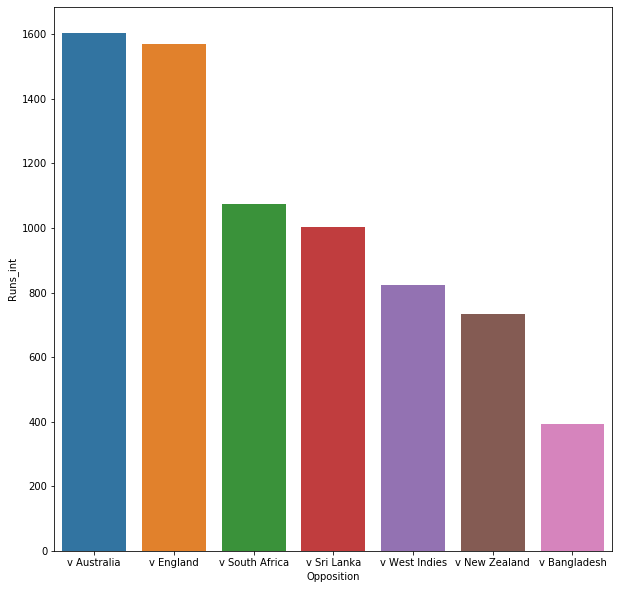

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(x='Opposition',y='Runs_int',data=runs_scored)

_______________________________________________________________________________________________________________________________________________

# Top 5 venues with runs scored

In [32]:
grounds = kohli.groupby(['Ground'])['Runs_int'].sum().sort_values(ascending=False).reset_index().head(5)

In [33]:
grounds.head(5)

,Ground,Runs_int
0,Delhi,467
1,Mumbai,433
2,Adelaide,431
3,Hyderabad (Deccan),379
4,Nagpur,354


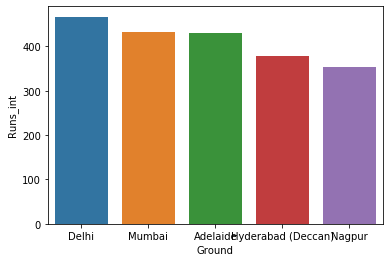

In [35]:
sns.barplot(x='Ground',y='Runs_int',data=grounds)

_______________________________________________________________________________________________________________________________________________

# Top 5 venues with average

In [37]:
kohli['dismissal_num'] = 1
for i in range(kohli.shape[0]):
    if kohli['Dismissal'].iloc[i] == 'not out' or kohli['Dismissal'].iloc[i] == '-':
        kohli['dismissal_num'].iloc[i] = 0
kohli

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Runs_int,Mins_int,BF_int,4s_int,6s_int,dismissal_num
0,4,13,10,1,0,40.00,5,caught,1,v West Indies,Kingston,20 Jun 2011,4,13,10,1,0,1
1,15,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,20 Jun 2011,15,72,54,2,0,1
2,0,1,2,0,0,0.00,5,caught,1,v West Indies,Bridgetown,28 Jun 2011,0,1,2,0,0,1
3,27,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,28 Jun 2011,27,118,107,1,1,1
4,30,62,53,2,0,56.60,5,caught,2,v West Indies,Roseau,6 Jul 2011,30,62,53,2,0,1
5,DNB,-,-,-,-,-,-,-,4,v West Indies,Roseau,6 Jul 2011,0,0,0,0,0,0
6,52,154,111,5,0,46.84,6,caught,2,v West Indies,Mumbai,22 Nov 2011,52,154,111,5,0,1
7,63,136,114,3,1,55.26,6,caught,4,v West Indies,Mumbai,22 Nov 2011,63,136,114,3,1,1
8,11,28,21,1,0,52.38,7,caught,2,v Australia,Melbourne,26 Dec 2011,11,28,21,1,0,1
9,0,3,1,0,0,0.00,6,lbw,4,v Australia,Melbourne,26 Dec 2011,0,3,1,0,0,1


In [44]:
df_avg = kohli.groupby(['Opposition'])[['Runs_int', 'dismissal_num']].sum().reset_index()
df_avg['avg'] = df_avg['Runs_int']/df_avg['dismissal_num']
df_avg = df_avg.sort_values(ascending=False, by='avg')
df_avg.head()

,Opposition,Runs_int,dismissal_num,avg
1,v Bangladesh,392,5,78.400000
5,v Sri Lanka,1004,13,77.230769
3,v New Zealand,735,11,66.818182
4,v South Africa,1075,18,59.722222
2,v England,1570,32,49.062500


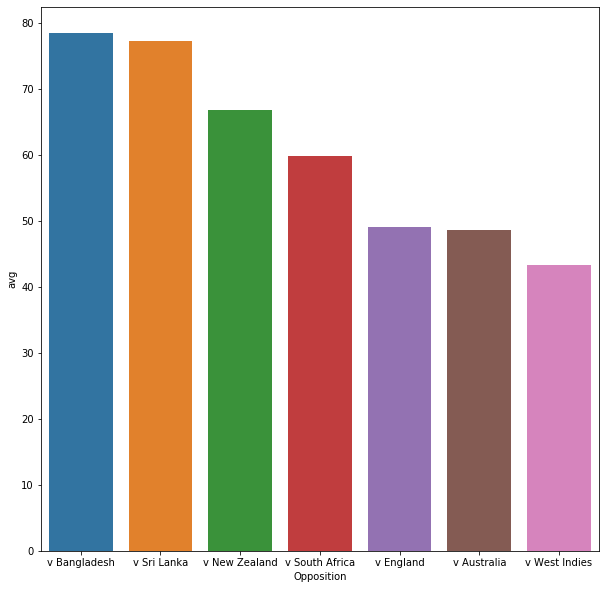

In [47]:
plt.figure(figsize=(10,10))
sns.barplot(x='Opposition',y='avg',data=df_avg)

In [49]:
print('Virat Kohli Average by Ground')
df_ground_avg = kohli.groupby(['Ground']).sum()[['Runs_int','dismissal_num']].reset_index()
df_ground_avg['average'] = df_ground_avg['Runs_int'] / df_ground_avg['dismissal_num']
df_ground_avg.sort_values(by='average', ascending=False).head(5)

Virat Kohli Average by Ground


,Ground,Runs_int,dismissal_num,average
42,Wellington,143,1,143.000000
34,Pune,267,2,133.500000
35,Rajkot,228,2,114.000000
4,Birmingham,200,2,100.000000
41,Visakhapatnam,299,3,99.666667


_______________________________________________________________________________________________________________________________________________

# Top 3 modes of dismissals

In [53]:
dismissals = kohli[(kohli['Dismissal'] != '-') & (kohli['Dismissal'] != 'not out')].groupby(['Dismissal'])['Runs'].count().reset_index().sort_values(by='Runs', ascending=False).head(3)
dismissals.head()

,Dismissal,Runs
1,caught,94
3,lbw,28
0,bowled,7


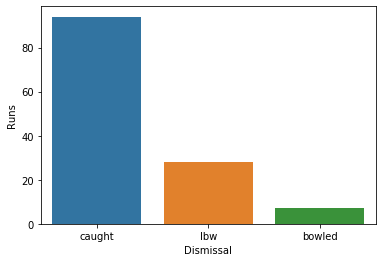

In [54]:
sns.barplot(x='Dismissal', y='Runs', data=dismissals)

In [60]:
kohli['innings#'] = kohli.index
kohli.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Runs_int,Mins_int,BF_int,4s_int,6s_int,dismissal_num,innings#
0,4,13,10,1,0,40.00,5,caught,1,v West Indies,Kingston,20 Jun 2011,4,13,10,1,0,1,0
1,15,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,20 Jun 2011,15,72,54,2,0,1,1
2,0,1,2,0,0,0.00,5,caught,1,v West Indies,Bridgetown,28 Jun 2011,0,1,2,0,0,1,2
3,27,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,28 Jun 2011,27,118,107,1,1,1,3
4,30,62,53,2,0,56.60,5,caught,2,v West Indies,Roseau,6 Jul 2011,30,62,53,2,0,1,4


# Kohli Runs by Batting Position

In [58]:
runs_position = kohli.groupby(['Pos'])[['Pos','Runs_int']].sum().sort_values(ascending=True, by='Pos').reset_index()
runs_position

,Pos,Runs_int
0,-,0
1,3,97
2,4,5692
3,5,998
4,6,404
5,7,11


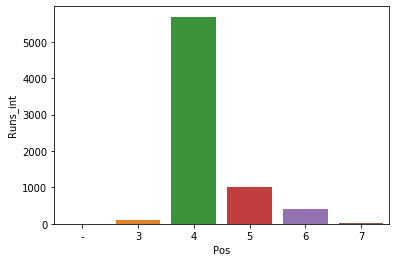

In [59]:
sns.barplot(x='Pos',y='Runs_int', data=runs_position)

<Figure size 720x720 with 0 Axes>

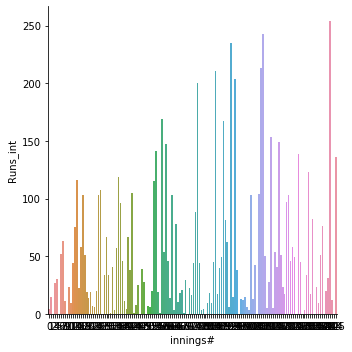

In [68]:
plt.figure(figsize=(10,10))
sns.catplot(x='innings#', y='Runs_int', data=kohli, kind='bar')